**Regression of Food Production(Paddy) production in Indonesia**

1. Kind of Food Production : Paddy
2. Region Production     : Central Java 

## Import relevant modules

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

%tensorflow_version 2.x
import tensorflow as tf



TensorFlow 2.x selected.


## Load Dataset

In [2]:
data_paddy = pd.read_csv('Padi.csv')
data_paddy.head()

,Provinsi,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,ACEH,1299699,1329536,1368074,1419128,1382905,1486909,1478712,1404580,1246614,1314165,1547499,1552078,1411650,1350748,1533369,1402287,1556858,1582393,1772962,1788738,1956940,1820062,2331046
1,SUMATERA UTARA,2918152,3079960,3134533,3136760,3212208,3321049,3451430,3514253,3291515,3153305,3403075,3418782,3447394,3007636,3265834,3340794,3527899,3582302,3607403,3715514,3727249,3631039,4044829
2,SUMATERA BARAT,1806424,1747543,1829192,1971180,1787719,1807622,1897678,1759059,1668955,1875834,1823739,1875188,1907390,1889489,1938120,1965634,2105790,2211248,2279602,2368390,2430384,2519020,2550609
3,RIAU,436297,445361,458756,461905,416135,370124,461630,431351,413391,396644,414237,454186,424095,42938,490087,494260,531429,574864,535788,512152,434144,385475,393917
4,JAMBI,607529,564722,593502,657650,572269,550277,553641,536779,556564,561007,578346,579404,579635,544597,58663,581704,644947,628828,646641,625164,664535,664720,541486


### Select Central Java Paddy production to make regression

Note : Production values in ton( weight unit of measure)

In [0]:
data_paddy_central_java = data_paddy[data_paddy['Provinsi']=="JAWA TENGAH"]
data_paddy_central_java = data_paddy_central_java.drop(columns='Provinsi')
data_paddy_central_java = data_paddy_central_java.T
data_paddy_central_java = data_paddy_central_java.reset_index()
data_paddy_central_java = data_paddy_central_java.rename(columns={"index":"Years",12:"Comodition_in_Ton"})
data_paddy_central_java = data_paddy_central_java[['Years', 'Comodition_in_Ton']].apply(pd.to_numeric)

In [4]:
data_paddy_central_java.head()

,Years,Comodition_in_Ton
0,1993,8174897
1,1994,7722611
2,1995,8198084
3,1996,8359105
4,1997,8328756


Ploting Data Distribution

##Sadly, no pre-processing needed. :')

# Modeling
using feature from 1993 until 2013 to make model, will try to predict values at 2013, 2014, and 2015.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(data_paddy_central_java['Years'], data_paddy_central_java["Comodition_in_Ton"], test_size=0.14, random_state=42,shuffle=False)

In [6]:
model = Ridge()
# model = Lasso()

model.fit(X_train.values.reshape(-1,1),y_train)
result = model.predict(X_test.values.reshape(-1,1))
result_rounded = [round(num, 1) for num in result]

# result_and_real = pd.concat(X_test,result,y_test)
# result_and_real

r2 = r2_score(y_test, result)
mse = mean_squared_error(y_test, result)
rmse = mean_squared_error(y_test, result, squared=False)


print(round(r2,3))
print(round(mse,3))
print(round(rmse,3))

-1.833
996972447641.719
998485.076


In [7]:
Real_n_result = pd.DataFrame(list(zip(X_test.tolist(), result_rounded, y_test.tolist())), 
               columns =['Years', 'Prediction','Actual'])

Real_n_result

,Years,Prediction,Actual
0,2012,9429780.5,10232934
1,2013,9511503.5,10344816
2,2014,9593226.5,9648104
3,2015,9674949.5,11301422


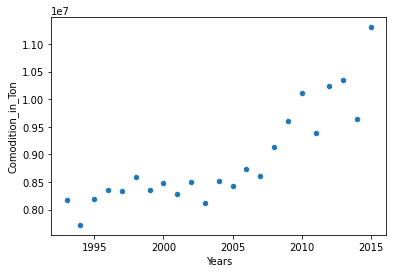

In [8]:
data_paddy_central_java.plot(kind='scatter',x='Years',y='Comodition_in_Ton')

plt.show()